In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, chisquare

---
# Estadística No Paramétrica y Prueba Ji-Cuadrada de Bondad de Ajuste
---

La **estadística no paramétrica** es una rama de la estadística que **no requiere asumir una forma específica para la distribución** de la población.
A diferencia de los métodos **paramétricos**, que dependen de parámetros poblacionales como la media (\mu) o la varianza (\sigma^2), los métodos no paramétricos se basan principalmente en **rangos, frecuencias o signos**.

Ejemplos de pruebas no paramétricas:

* Ji-Cuadrada (($\chi^2$))
* Kolmogorov–Smirnov
* Mann–Whitney U
* Wilcoxon
* Kruskal–Wallis

---


La **bondad de ajuste** mide **qué tan bien una distribución teórica se ajusta a los datos observados**.

En otras palabras, se compara:

* lo que **se observa en la muestra** ((o_i)), con
* lo que **se esperaría teóricamente** bajo cierta hipótesis ((e_i)).

Si las diferencias entre (o_i) y (e_i) son pequeñas, decimos que la distribución teórica **ajusta bien** los datos.

---
Prueba Ji-Cuadrada ((\chi^2)) de Bondad de Ajuste:

Hipótesis:


\begin{cases}
H_0: \text{Los datos siguen la distribución teórica especificada.} \\
H_{\alpha}: \text{Los datos no siguen la distribución teórica especificada.}
\end{cases}



**Estadístico de prueba:**

$T = \chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$

donde:

* (O_i) = frecuencia **observada** en la categoría (i),
* (E_i) = frecuencia **esperada** en la categoría (i),
* (k) = número de categorías.
---

$\text{Región crítica: } \chi^2_{\text{calc}} > \chi^2_{1-\alpha, , (k - 1)}$

donde ((k-1)) son los **grados de libertad**.

In [ ]:
def erdos_renyi_gen(n, p, seed=42):
    """
    Genera una red Erdos–Rényi G(n,p),
    compara la distribución de grados con Binomial y Poisson usando la prueba de
    bondad de ajuste chi-cuadrada, y grafica los resultados.
    """
    G = nx.erdos_renyi_graph(n, p, seed=seed)
    grados = np.array([d for _, d in G.degree()])
    total = len(grados)
    #Valores y frecuencias
    values, counts = np.unique(grados, return_counts=True)

    #Param teóricos
    lambda_poisson = (n - 1)*p #N-1 posibles vecinos, no lazos
    #Dist teóricas
    prob_binom = binom.pmf(values, n - 1, p)
    prob_poisson = poisson.pmf(values, lambda_poisson)

    #Ajuste de frecuencias esperadas y normalización
    exp_binom = prob_binom * total
    exp_binom *= total / exp_binom.sum()
    exp_poisson = prob_poisson * total
    exp_poisson *= total / exp_poisson.sum()

    #Prueba de bondad de ajuste chi-cuadrada
    chi2_binom = chisquare(counts, exp_binom)
    chi2_poisson = chisquare(counts, exp_poisson)

    #Gráficas
    plt.figure(figsize=(10,10))
    colors = ['#cad5ad', '#e77a77', '#54343f']

    plt.bar(values, counts/total, color=colors[2], alpha=0.8, label='Empírica')
    plt.plot(values, exp_binom/total, 'o-', color=colors[1], label='Binomial', linewidth=5)
    plt.plot(values, exp_poisson/total, 'v-', color=colors[0], label='Poisson', linewidth=5)

    plt.title(f"Distribución de grados con N={n}, p={p}", fontname='sans-serif', fontsize=16)
    plt.xlabel("<k>", fontsize=12)
    plt.ylabel("P", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.1)
    plt.show()

    print(f"N={n}, p={p}")
    print(f"Chi² Binomial: χ²={chi2_binom.statistic:.3f}, p-value={chi2_binom.pvalue:.3f}")
    print(f"Chi² Poisson:  χ²={chi2_poisson.statistic:.3f}, p-value={chi2_poisson.pvalue:.3f}")
    print("-"*60)

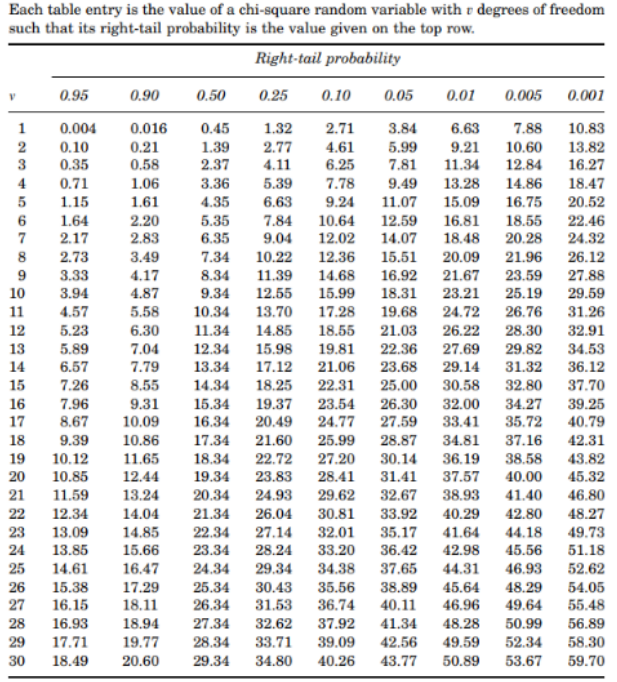

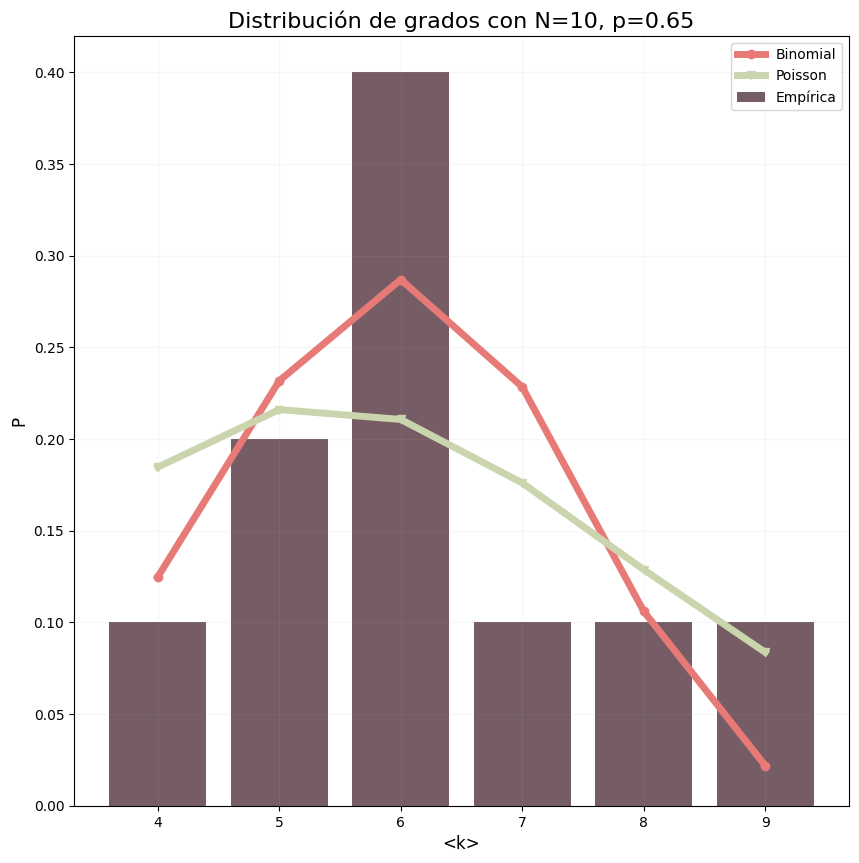

N=10, p=0.65
Chi² Binomial: χ²=4.052, p-value=0.542
Chi² Poisson:  χ²=2.526, p-value=0.773
------------------------------------------------------------


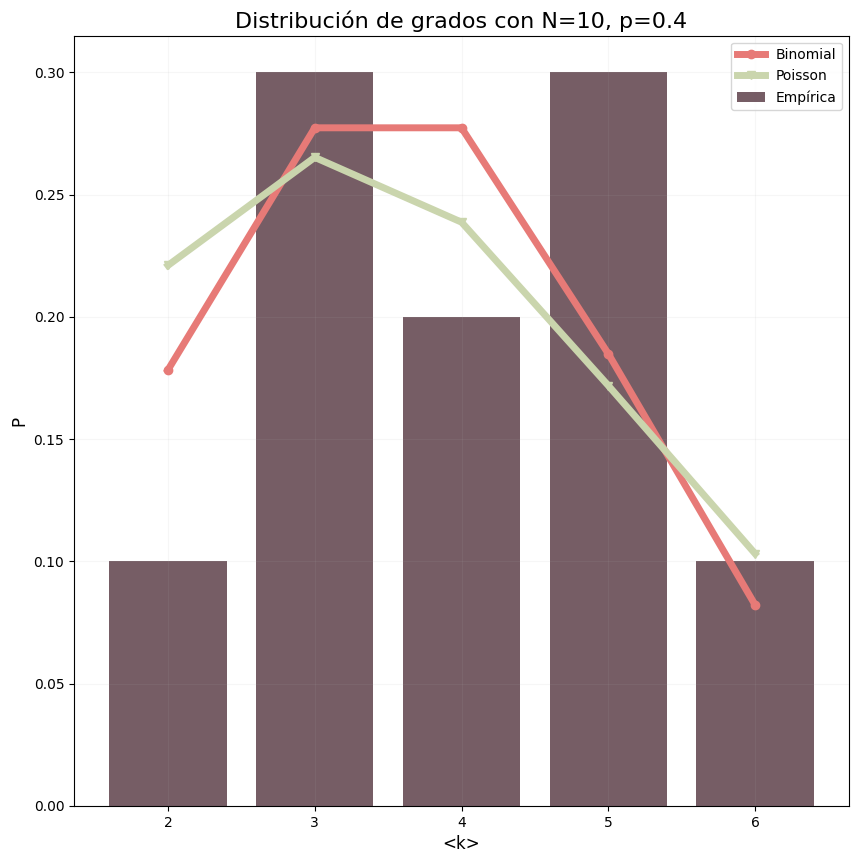

N=10, p=0.4
Chi² Binomial: χ²=1.333, p-value=0.856
Chi² Poisson:  χ²=1.727, p-value=0.786
------------------------------------------------------------


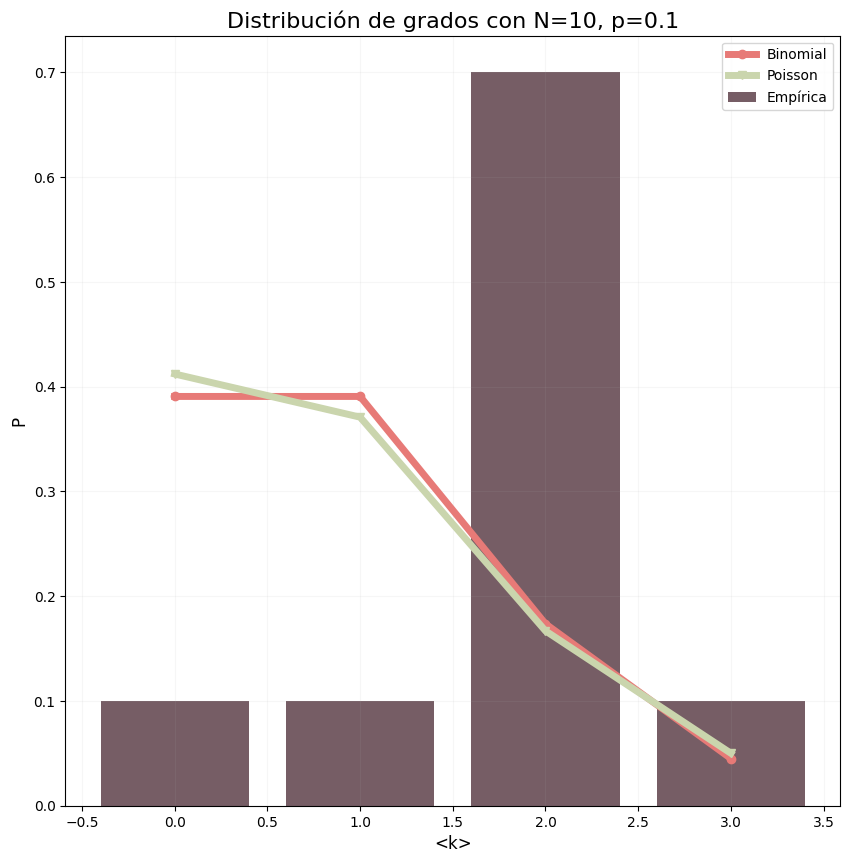

N=10, p=0.1
Chi² Binomial: χ²=20.954, p-value=0.000
Chi² Poisson:  χ²=21.867, p-value=0.000
------------------------------------------------------------


In [ ]:
N = 10
P_values = [0.65, 0.40, 0.10]

for p in P_values:
  erdos_renyi_gen(N, p)

| p    | χ² Binomial | p     | χ² Poisson | p     | Interpretación  |
| ---- | ----------- | ----- | ---------- | ----- | ---------       |
| 0.65 | 4.052       | 0.542 | 2.526      | 0.773 | Ambos ajustes son buenos. Con pocos nodos y p grande, tanto Binomial como Poisson ajustan bastante.|
| 0.40 | 1.333       | 0.856 | 1.727      | 0.786 | Igual que arriba     |
| 0.10 | 20.954      | 0.000 | 21.867     | 0.000 | Ninguna de las 2 se ajusta a la teoría pues son valores muy pequeños para N y p.|


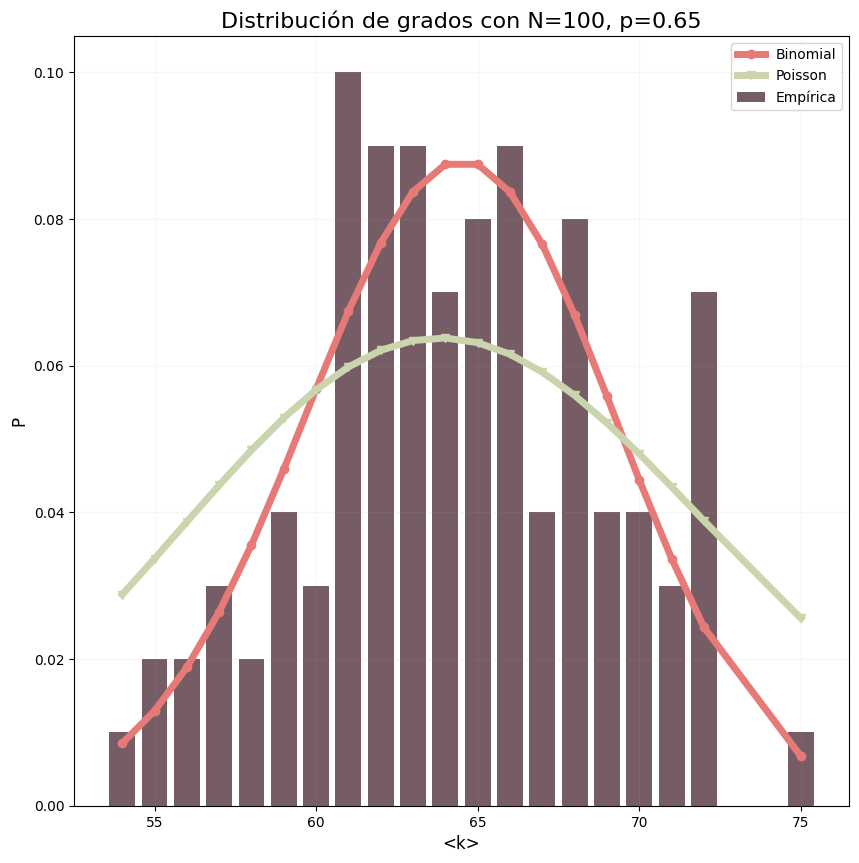

N=100, p=0.65
Chi² Binomial: χ²=16.052, p-value=0.654
Chi² Poisson:  χ²=19.179, p-value=0.445
------------------------------------------------------------


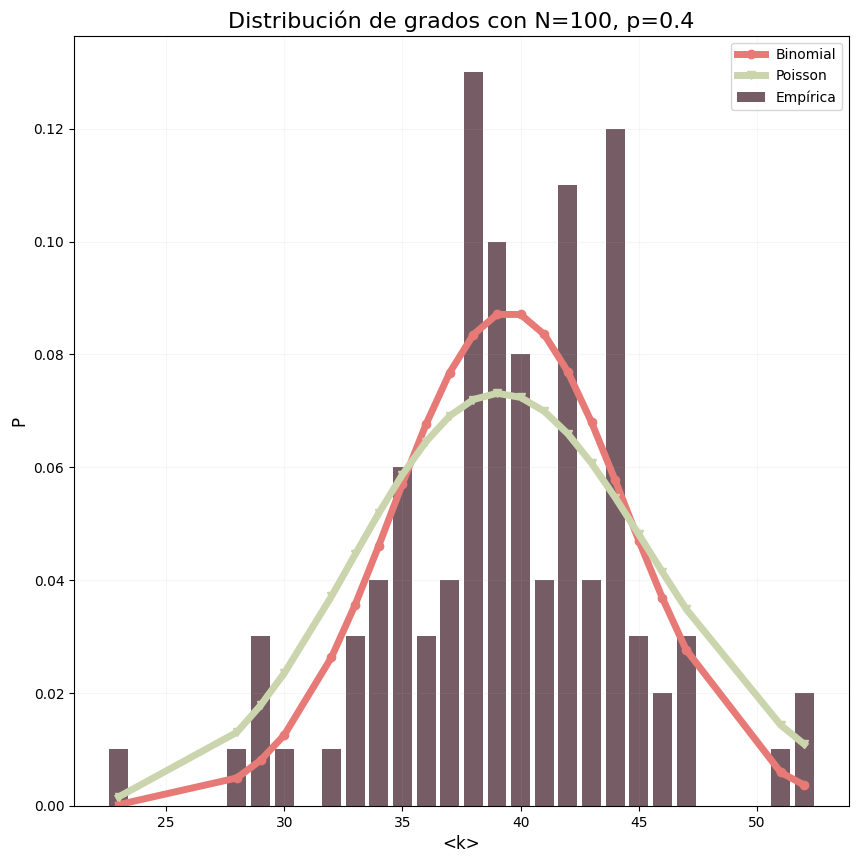

N=100, p=0.4
Chi² Binomial: χ²=83.285, p-value=0.000
Chi² Poisson:  χ²=33.222, p-value=0.044
------------------------------------------------------------


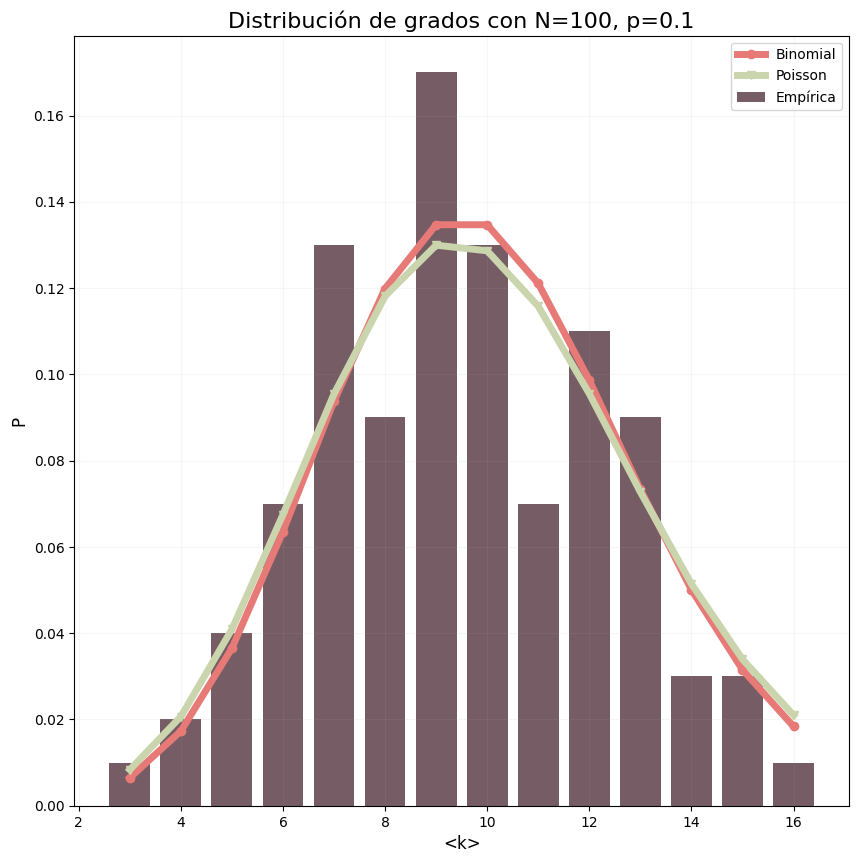

N=100, p=0.1
Chi² Binomial: χ²=7.271, p-value=0.888
Chi² Poisson:  χ²=7.157, p-value=0.894
------------------------------------------------------------


In [ ]:
N = 100
P_values = [0.65, 0.40, 0.10]

for p in P_values:
  erdos_renyi_gen(N, p)

| p    | χ² Binomial | p     | χ² Poisson | p     | Interpretación    |
| ---- | ----------- | ----- | ---------- | ----- |    --------       |
| 0.65 | 16.052      | 0.654 | 19.179     | 0.445 | Es buen ajuste para Bin, no tanto para Poisson pues p es grande.|
| 0.40 | 83.285      | 0.000 | 33.222     | 0.044 | Binomial ajusta fatal se rechaza $H_0$, Poisson no se rechaza por muy poco. |
| 0.10 | 7.271       | 0.888 | 7.157      | 0.894 | Excelente ajuste para ambos. La aproximación Poisson funciona y pues N es grande y p pequeño.|


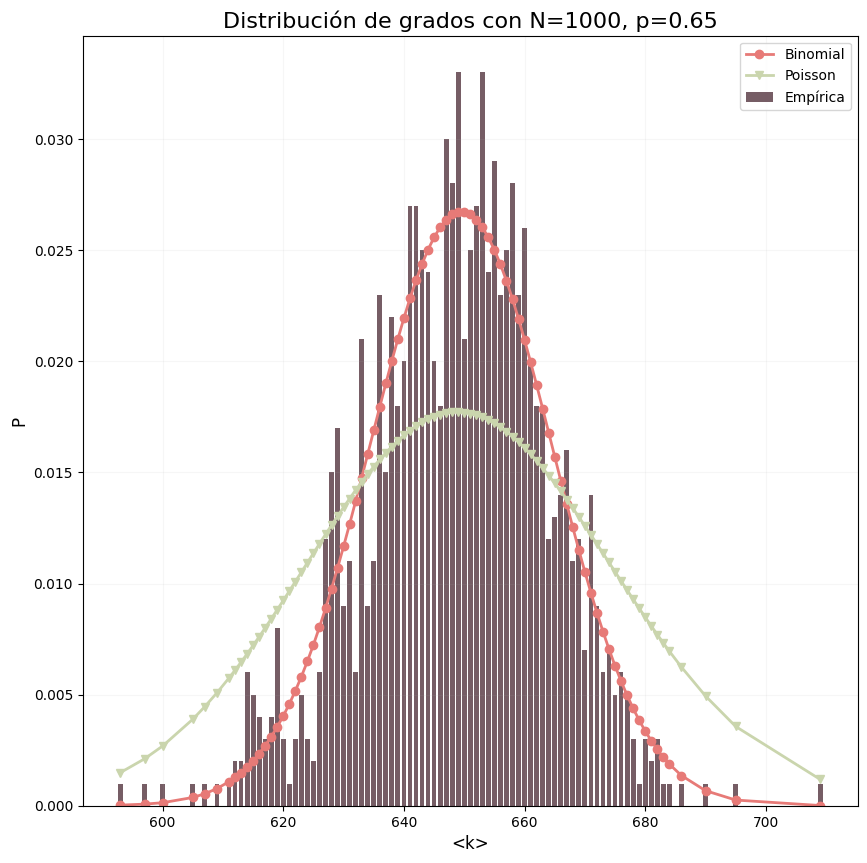

N=1000, p=0.65
Chi² Binomial: χ²=246.817, p-value=0.000
Chi² Poisson:  χ²=247.082, p-value=0.000
------------------------------------------------------------


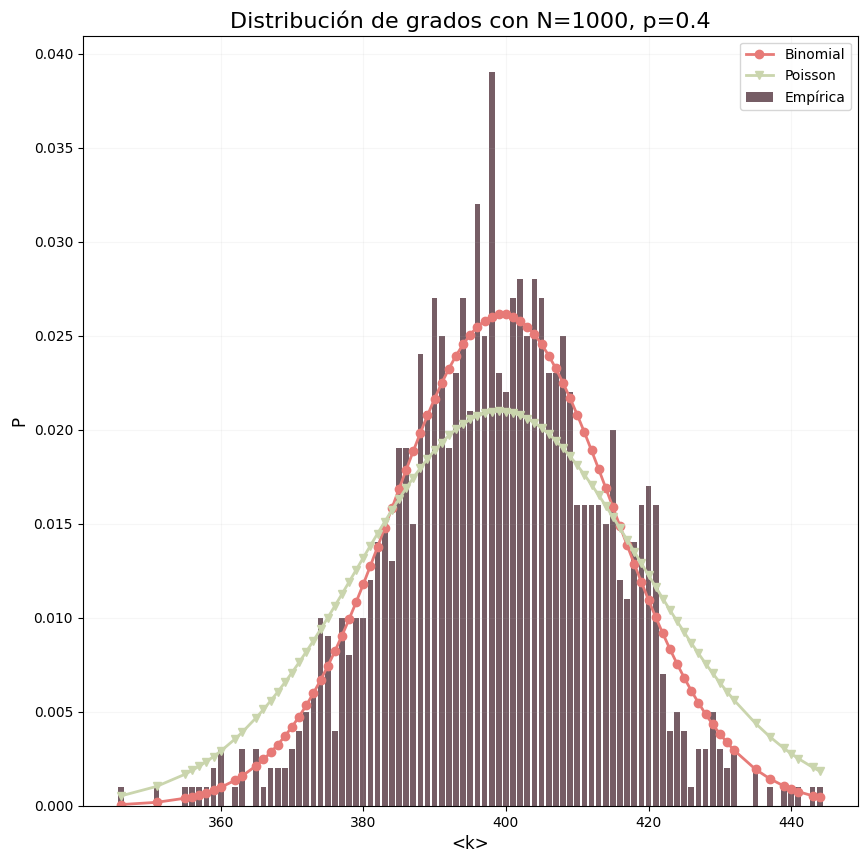

N=1000, p=0.4
Chi² Binomial: χ²=78.304, p-value=0.655
Chi² Poisson:  χ²=123.742, p-value=0.003
------------------------------------------------------------


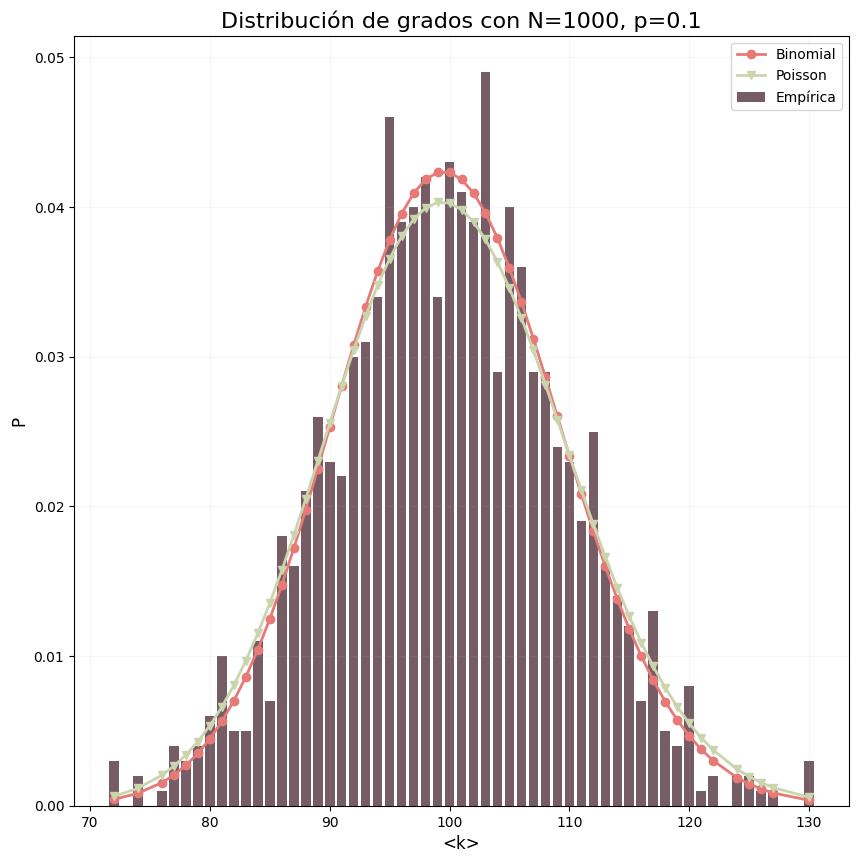

N=1000, p=0.1
Chi² Binomial: χ²=71.111, p-value=0.049
Chi² Poisson:  χ²=54.631, p-value=0.412
------------------------------------------------------------


In [ ]:
N = 1000
P_values = [0.65, 0.40, 0.10]

for p in P_values:
  erdos_renyi_gen(N, p)

| p    | χ² Binomial | p     | χ² Poisson | p     | Interpretación      |
| ---- | ----------- | ----- | ---------- | ----- | ------------------- |
| 0.65 | 246.817     | 0.000 | 247.082    | 0.000 | p grande → Binomial y Poisson no ajustan, distribución empírica muy centrada y estrecha, Poisson se ajusta peor pues p no es pequeño.|
| 0.40 | 78.304      | 0.655 | 123.742    | 0.003 | Binomial ajusta bien, Poisson empieza a fallar porque p no es pequeño.|
| 0.10 | 71.111      | 0.049 | 54.631     | 0.412 | Poisson ajusta mucho mejor que Binomial (p ~0.41), Binomial apenas pasa (p=0.049). Esto confirma teoría: **N grande, p pequeño → Poisson ≈ Binomial**.|
